In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [64]:
'''Our boundary line is defined by w1*x1 + w2*x2 + b = 0'''

w1 = np.random.randint(low=0,high=10)/10
w2 = np.random.randint(low=0,high=10)/10
b = np.random.randint(low=-5,high=0)/10

true_weight_vector = [b, w1, w2]

'''If for any element x[0] + w1*x[1] + w2*x[2] > 0, then classification = 1 

In other words, if the combined weighted value of x1 andd x2 is greater than b, then classification ==1''';

In [65]:
true_weight_vector

[-0.4, 0.3, 0.7]

In [66]:
x0 = np.ones(100);
x1 = np.random.rand(100);
x2 = np.random.rand(100);

data = []
for i in range(len(x1)):
    data.append([x0[i],x1[i],x2[i]])

for element in data:
    classification = np.sign( np.dot(element,true_weight_vector) ) 
    element.append(classification)
    
df = pd.DataFrame(data,columns = ['x0','x1','x2','classification']);
df1 = df[df['classification']==1];
df_1 = df[df['classification']==-1];

In [67]:
df.head()

,x0,x1,x2,classification
0,1.0,0.503435,0.402209,1.0
1,1.0,0.305888,0.180650,-1.0
2,1.0,0.447741,0.112036,-1.0
3,1.0,0.507437,0.492463,1.0
4,1.0,0.325401,0.884453,1.0


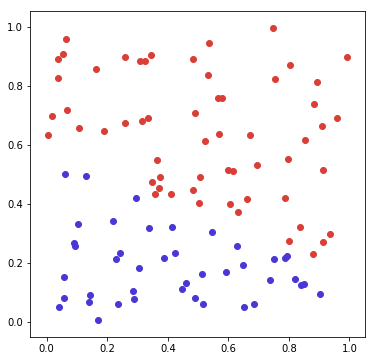

In [68]:
f = plt.figure(figsize=(6,6));
plt.scatter(df1['x1'],df1['x2'],color='#d93f37')
plt.scatter(df_1['x1'],df_1['x2'],c='#4937d6')

plt.show()

In [89]:
class Perceptron:
    '''This class has the capacity to run and visualize a 2-dimensional perceptron learning algorithm.
    To use the perceptron, first create a new instance of the object, i.e.
    
    my_perceptron = Perceptron()      Creating the perceptron does not require the passing of any variables.
    
    To run this perceptron over a dataset, the model requires that your provide the data in a 
    four column pandas DataFrame, with columns labeled ['x0','x1','x2','classification'], with x0 being your bias term.
    
    Pass your pandas DataFrame into:
    
    my_perpceptron.main(data = my_df)
    
    and watch the perceptron do its thing - percept the data?!   
    '''
    def __init__(self,
             learning_rate = .1,
             initial_weights = list(np.random.rand(3)*2-1),
             n_trials=100):
        
        
        self.learning_rate = learning_rate
        self.weight_vector = initial_weights
        
        
            
    def update_weights(self,x):
        
        self.weight_vector = self.weight_vector + self.learning_rate * x[3] * np.array(x[:3])
        self.weight_vector[0] = b
        
    
    
    
    def train(self,data, n_trials=100):
        
        data['current h'] = np.sign( np.dot(data[['x0','x1','x2']], self.weight_vector) )
        data_misclassified = data[data['classification'] != data['current h']]
        N_misclassified = data_misclassified.shape[0]
        learned = False
        iteration = 0
        
        while not learned:
            
            random_index = np.random.randint(low=0,high=N_misclassified)
            random_misclassified_element = data_misclassified[random_index: random_index + 1].values.tolist()[0]

            self.update_weights(x=random_misclassified_element)

            data['current h'] = np.sign( np.dot(data[['x0','x1','x2']], self.weight_vector) )
            data_misclassified = data[data['classification'] != data['current h']]
            N_misclassified = data_misclassified.shape[0]

            iteration += 1
            
            
            df1 = data[data['classification']==1];
            df_1 = data[data['classification']==-1];

            a = self.weight_vector[1]/self.weight_vector[2];
            b1 = b/self.weight_vector[2];
            x1 = np.linspace(0,1,100) 
            x2 = -(a*x1 + b1);

            f = plt.figure(figsize=(6,6));
            plt.scatter(df1['x1'],df1['x2'],color='#d93f37')
            plt.scatter(df_1['x1'],df_1['x2'],c='#4937d6')
            plt.plot(x1,x2, color = '#41dba8')
            plt.ylim(0,1)
            plt.xlim(0,1)
            plt.title('Trial #{}\nMisclassifications: {}\nw0={:.2f}; w1={:.2f}; w2={:.2f}'.format(iteration,
                                                                                          N_misclassified,
                                                                                           self.weight_vector[0],
                                                                                           self.weight_vector[1],
                                                                                           self.weight_vector[2]))
            plt.show()
            
           
            if N_misclassified == 0 or iteration >= n_trials:
                print('iterations', iteration)
                
                learned = True        
                
                     
        return data, self.weight_vector
    
    
    
    
    def main(self,
             data,
             learning_rate = 0.1,
             initial_weights = np.random.rand(3)*2-1,
             n_trials=100):
        
        data = pd.DataFrame(data, columns =['x0','x1','x2','classification']);
        
        perceptron = Perceptron(data = data)
        
        output, weights = perceptron.train(data = data, n_trials=n_trials)
        
        return output, weights
        
        
                
                
                
        
        
        
        
        

In [90]:
X = Perceptron(data=df)

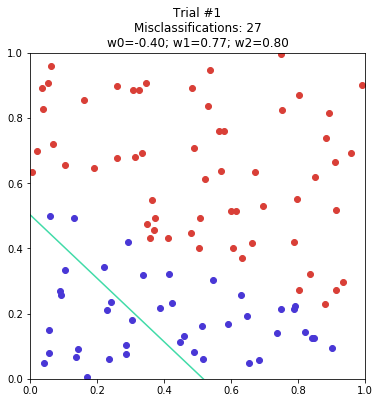

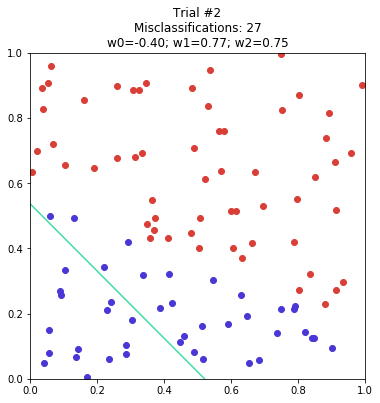

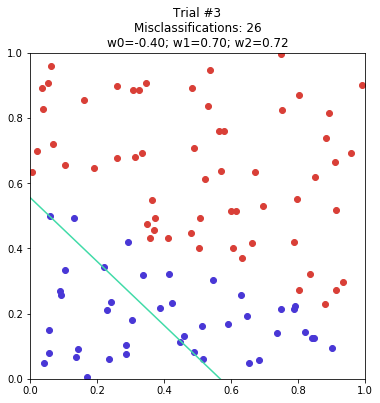

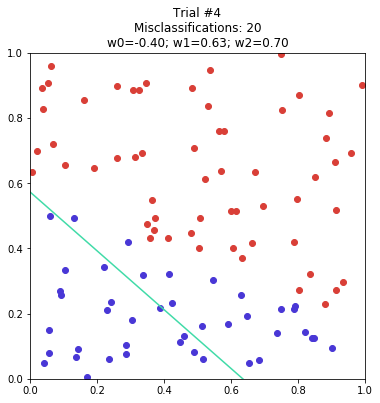

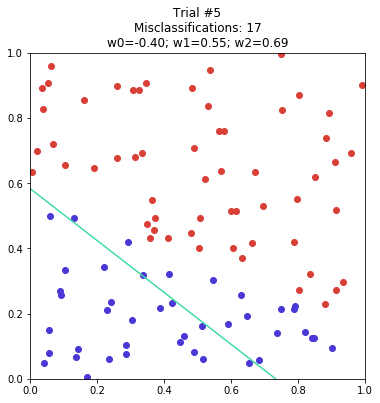

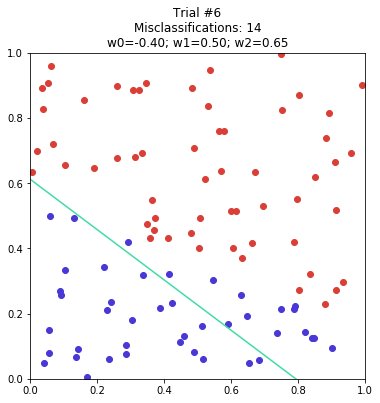

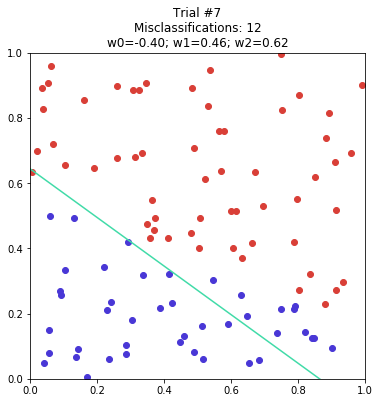

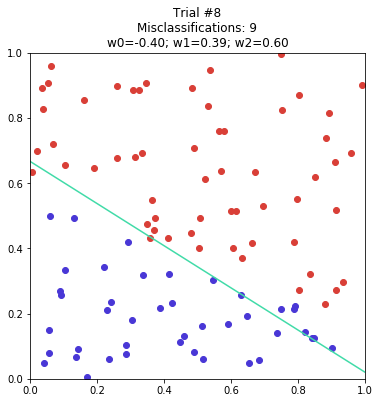

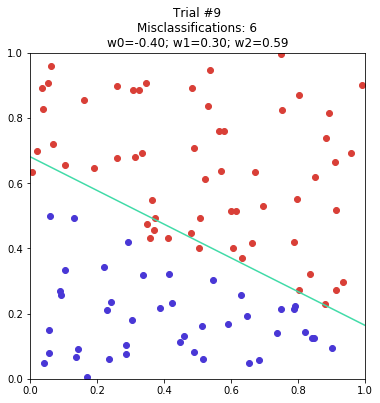

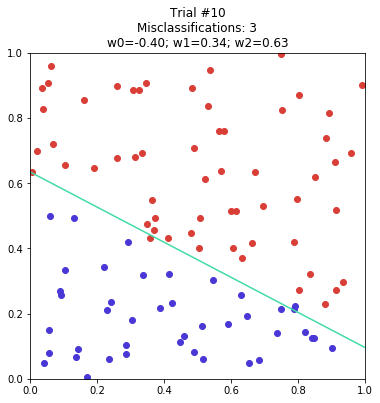

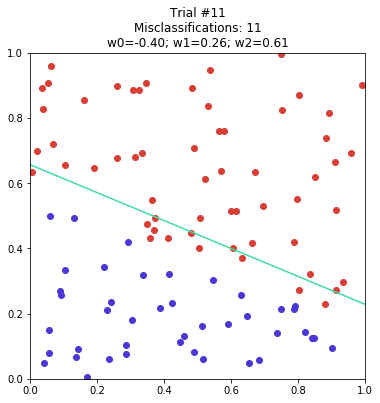

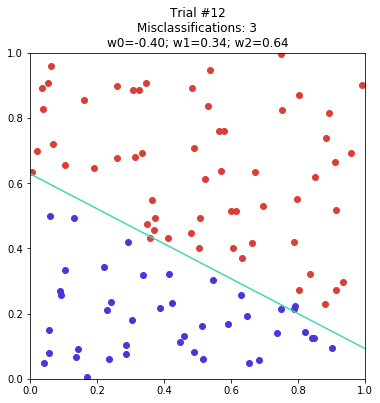

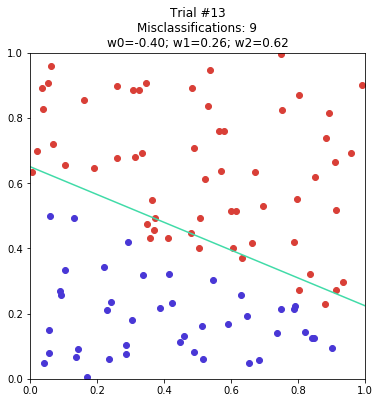

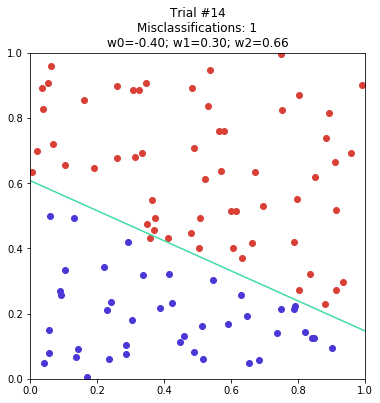

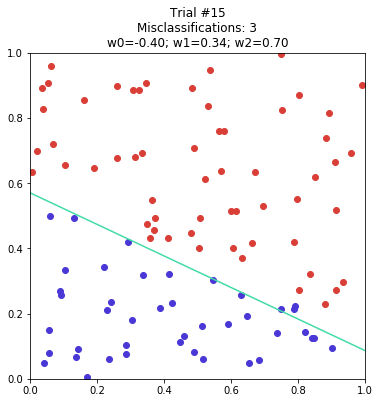

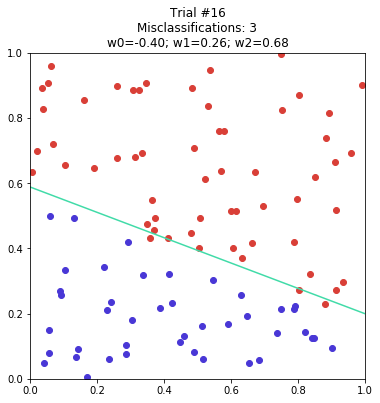

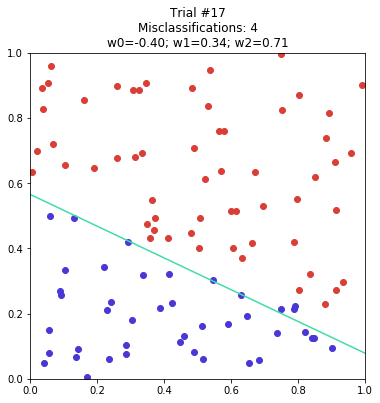

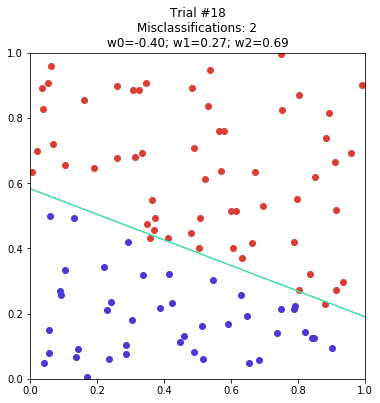

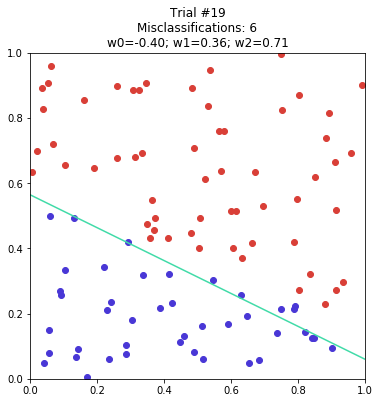

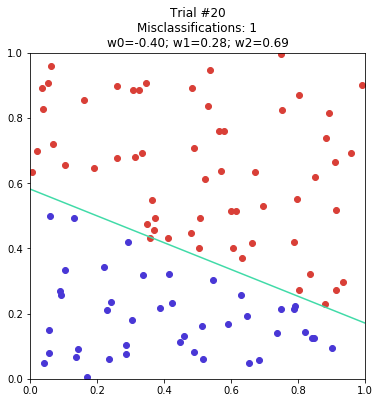

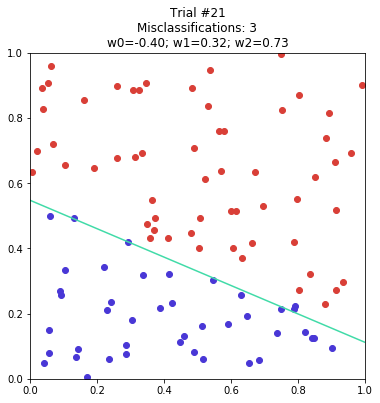

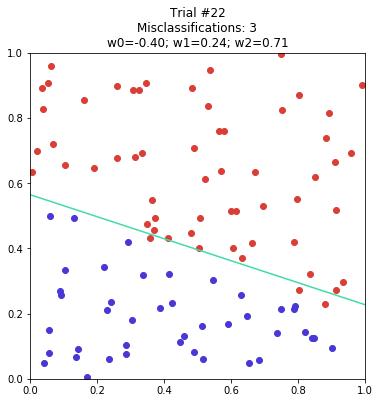

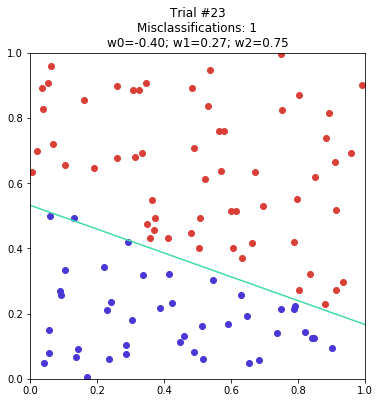

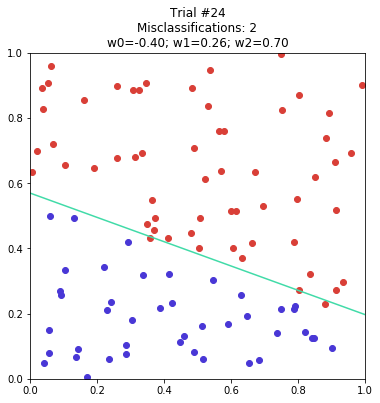

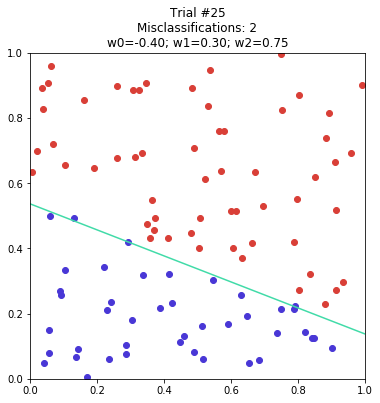

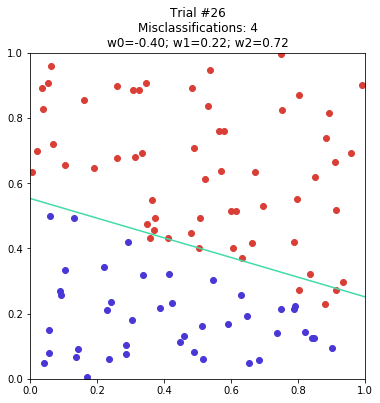

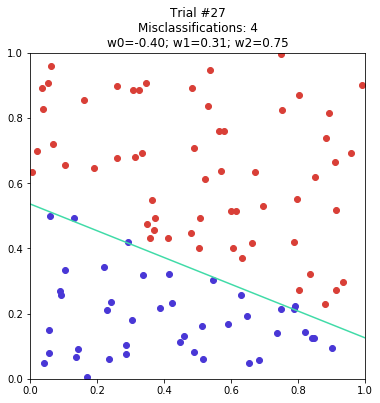

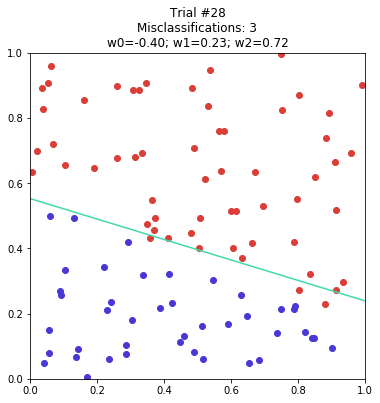

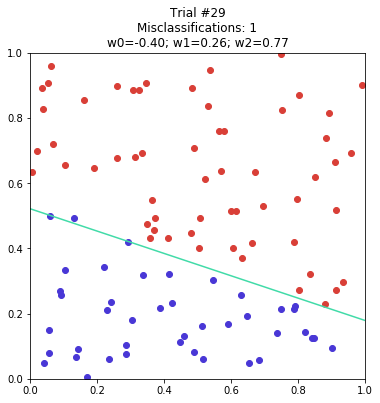

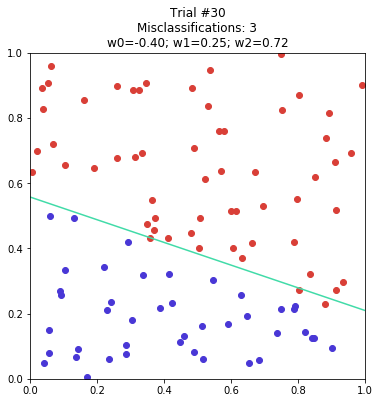

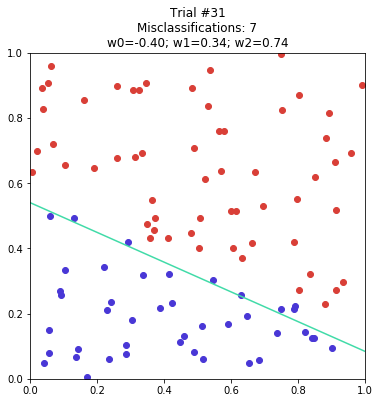

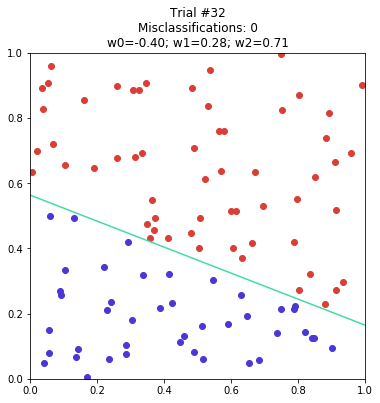

iterations 32


In [91]:
output, weights = X.main(n_trials = 1000)